In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings

In [3]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

## Loading the Processed Dataset

In [4]:
try:
    df = pd.read_csv('Processed_Online_Retail_2.csv', encoding='latin1')
    print("Data Loaded Successfully")
except FileNotFoundError:
    print(f"Error: The file {'Processed_Online_Retail_2.csv'} was not found.")
    print("Please make sure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

Data Loaded Successfully


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      524878 non-null  object 
 1   StockCode      524878 non-null  object 
 2   Description    524878 non-null  object 
 3   Quantity       524878 non-null  int64  
 4   InvoiceDate    524878 non-null  object 
 5   UnitPrice      524878 non-null  float64
 6   Country        524878 non-null  object 
 7   TotalSales     524878 non-null  float64
 8   Invoice_Date   524878 non-null  object 
 9   InvoiceYear    524878 non-null  int64  
 10  InvoiceMonth   524878 non-null  int64  
 11  InvoiceWeek    524878 non-null  int64  
 12  WeekStartDate  524878 non-null  object 
 13  IncoiceDay     524878 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 56.1+ MB


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalSales,Invoice_Date,InvoiceYear,InvoiceMonth,InvoiceWeek,WeekStartDate,IncoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12-01,2010,12,48,2010-11-29,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12-01,2010,12,48,2010-11-29,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12-01,2010,12,48,2010-11-29,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12-01,2010,12,48,2010-11-29,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12-01,2010,12,48,2010-11-29,Wednesday


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      524878 non-null  object        
 1   StockCode      524878 non-null  object        
 2   Description    524878 non-null  object        
 3   Quantity       524878 non-null  int64         
 4   InvoiceDate    524878 non-null  datetime64[ns]
 5   UnitPrice      524878 non-null  float64       
 6   Country        524878 non-null  object        
 7   TotalSales     524878 non-null  float64       
 8   Invoice_Date   524878 non-null  object        
 9   InvoiceYear    524878 non-null  int64         
 10  InvoiceMonth   524878 non-null  int64         
 11  InvoiceWeek    524878 non-null  int64         
 12  WeekStartDate  524878 non-null  object        
 13  IncoiceDay     524878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7

In [9]:
numerical_cols = ['Quantity', 'UnitPrice', 'TotalSales']

## Performing Univariate Analysis

### Summary Statistics of Numerical Features
`describe()` is used to get an overview of the central tendency (mean, median), spread (std dev, min, max), and quartile information of the numerical features, `Quantity`, `UnitPrice`, and `TotalSales`, defined as `numerical_cols`.

In [10]:
print("\nSummary Statistics for Numerical Columns:\n", df[numerical_cols].describe())


Summary Statistics for Numerical Columns:
             Quantity      UnitPrice     TotalSales
count  524878.000000  524878.000000  524878.000000
mean       10.616600       3.922573      20.275399
std       156.280031      36.093028     271.693566
min         1.000000       0.001000       0.001000
25%         1.000000       1.250000       3.900000
50%         4.000000       2.080000       9.920000
75%        11.000000       4.130000      17.700000
max     80995.000000   13541.330000  168469.600000


### Distribution of Categorical Feature
`value_counts()` is used to get the frequency of each unique value in a categorical columns, `Country` and `Description`. This helps in understanding the dominance of certain categories, like the top countries with the most transactions.

In [11]:
print("\nDistribution of Categorical Features:\n", df['Country'].value_counts())
print("\nTop 10 products sold by Description:\n", df['Description'].value_counts().head(10))
print("\nTop 10 products sold by Total Sales:\n", df.groupby('Description')['TotalSales'].sum().nlargest(10))
print("\nTop 10 products sold by Quantity:\n", df.groupby('Description')['Quantity'].sum().nlargest(10))


Distribution of Categorical Features:
 Country
United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community    

### Visualization of Numerical Features
Histograms and KDE plots are used to visualize the distribution of numerical data. They help identify the shape, skewness, and kurtosis of the data, as well as the presence of outliers.

Visualizing Numerical Features...


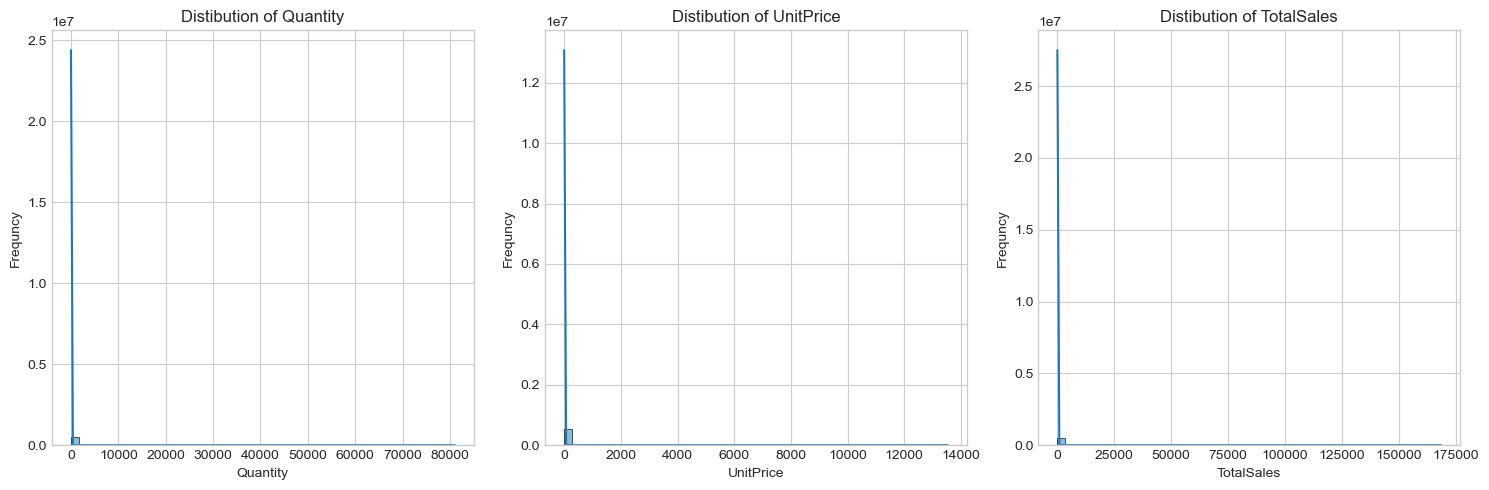

In [12]:
print("Visualizing Numerical Features...")
plt.figure(figsize = (15,5))
for i,col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequncy")

plt.tight_layout()
plt.show()

The `TotalSales` and `Quantity` distributions are highly skewed to the right, with a large number of transactions having low values and a few number of very large transactions. The `UnitPrice` also shows a similar pattern. This suggests the presence of outliers and a need for potential data transformation or careful handling during modeling.

### Visualization of Categorical Features
A count plot which is a bar chart showing the counts of observations in each categorical bin is plotted to provide a clear visual representation of the most frequent countries in the dataset.

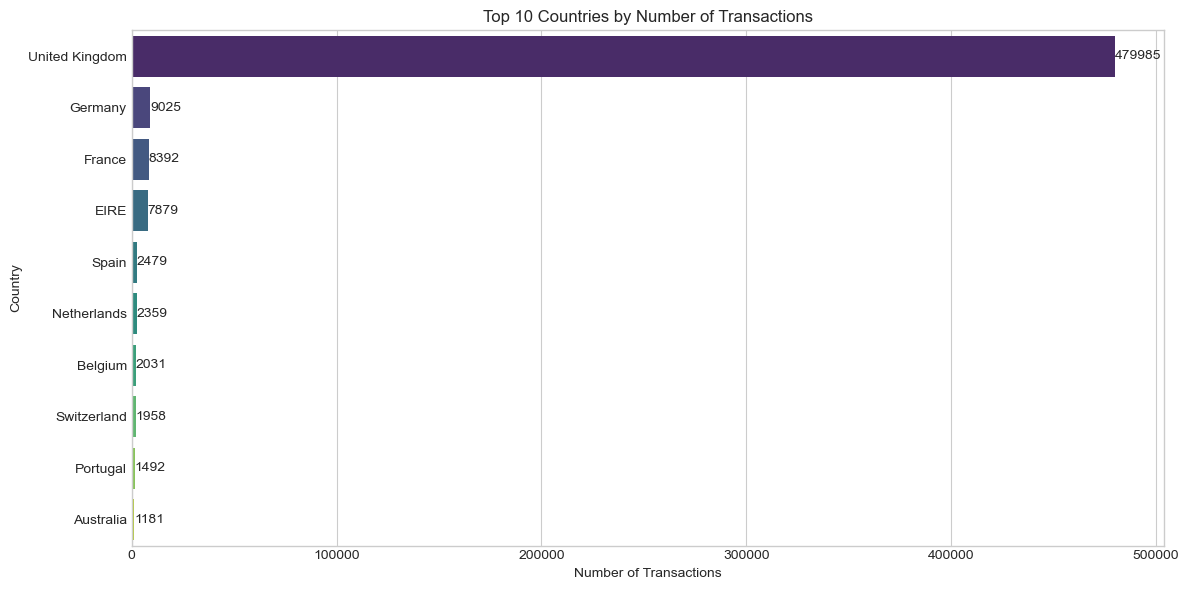

In [13]:
top_countries = df['Country'].value_counts().head(10).index
plt.figure(figsize = (12,6))
cat_plt = sns.countplot(data = df[df['Country'].isin(top_countries)], y='Country', order = top_countries, palette = 'viridis')
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
for container in cat_plt.containers:
    cat_plt.bar_label(container, label_type='edge')
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Correlation Matrix and Heatmaps
Correlation coefficients measure the strength and direction of a linear relationship between two numerical variables. A heatmap provides a visual representation of the correlation matrix, with color intensity indicating the strength of the correlation. Together, these tools are essential in bivariate analysis for quickly identifying and understanding the relationships between different features.

Calculating Correlation between Numerical Features...

Correlation Matrix:
             Quantity  UnitPrice  TotalSales
Quantity    1.000000  -0.003788    0.907402
UnitPrice  -0.003788   1.000000    0.137381
TotalSales  0.907402   0.137381    1.000000


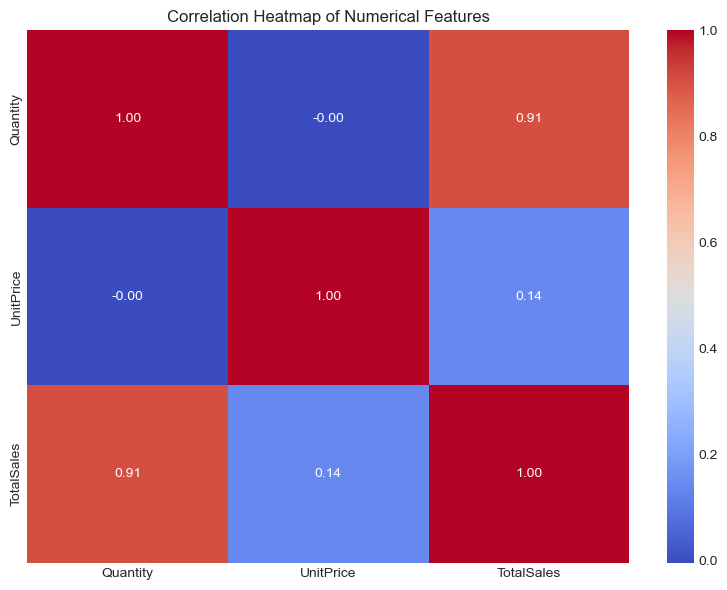

In [14]:
print("Calculating Correlation between Numerical Features...")
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize = (8,6))
plt.title("Correlation Heatmap of Numerical Features")
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.tight_layout()
plt.show()

There is a strong positive correlation between `Quantity` and `TotalSales`, which is expected as `TotalSales` is product of `Quantity` and `UnitPrice`. This confirms the data's integrity. Similarly, there will be a strong positive correlation between `TotalSales` and `UnitPrice`. Conversely, the correlation between the `Quantity`and `UnitPrice` is negative. However, given that the value is so close to zero, this negative trend is negligible and not statistically significant. This result is unusual in a retail environment where one would often expect a negative correlation due to the law of demand. The extremely low correlation suggests that other factors, such as seasonality, promotions, customer demographics, or product type, are much more influential on sales quantity than the price itself.

### Scatter Plots
Scatter plots are used to visualize the relationship between two numerical variables which help in detecting the linear or non-linear relationship between them and the clusters of data points

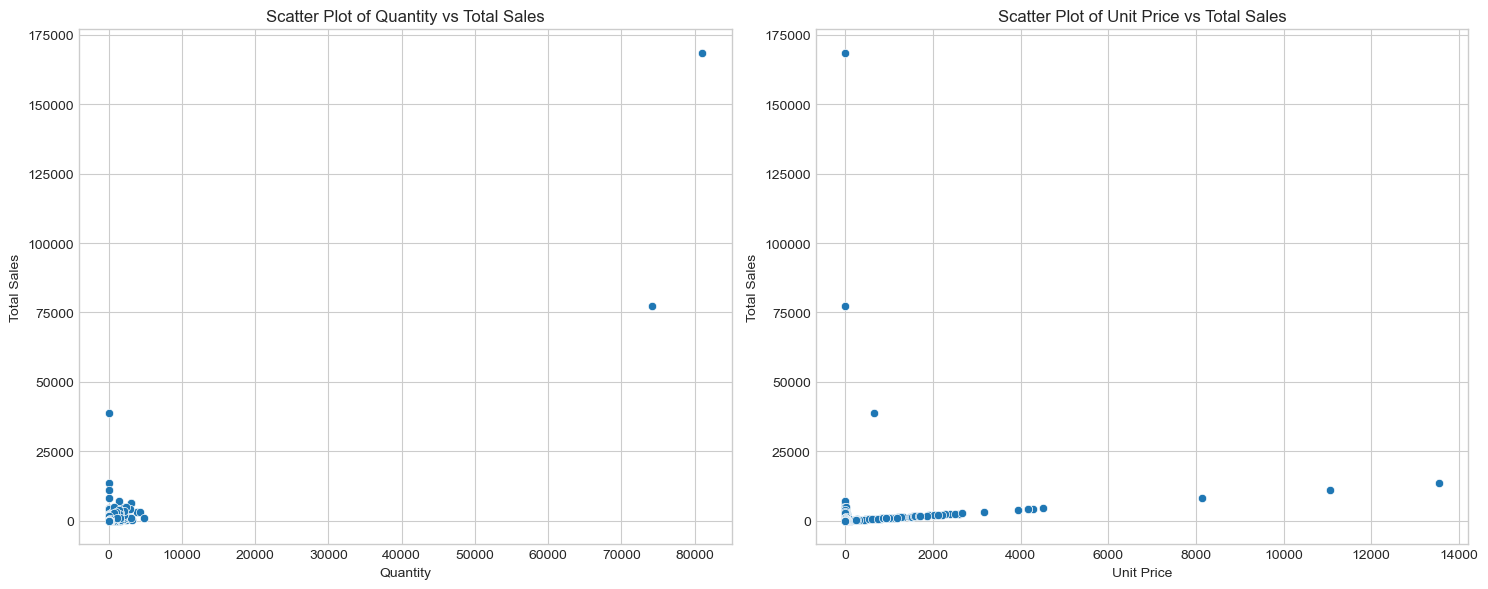

In [15]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'Quantity', y = 'TotalSales')
plt.title("Scatter Plot of Quantity vs Total Sales")
plt.xlabel("Quantity")
plt.ylabel("Total Sales")

plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'UnitPrice', y = 'TotalSales')
plt.title("Scatter Plot of Unit Price vs Total Sales")
plt.xlabel("Unit Price")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

The provided scatter plot analysis indicates a positive correlation between both quantity sold and unit price with total sales. As the number of items sold increases, so do total sales. Likewise, an increase in unit price is associated with higher total sales. Both plots show a general upward trend, with data points concentrated in the lower-value ranges (low quantity and low unit price corresponding to low total sales) and extending towards the higher-value ranges.

### Box Plots to compare Total Sales across countries by Transaction count

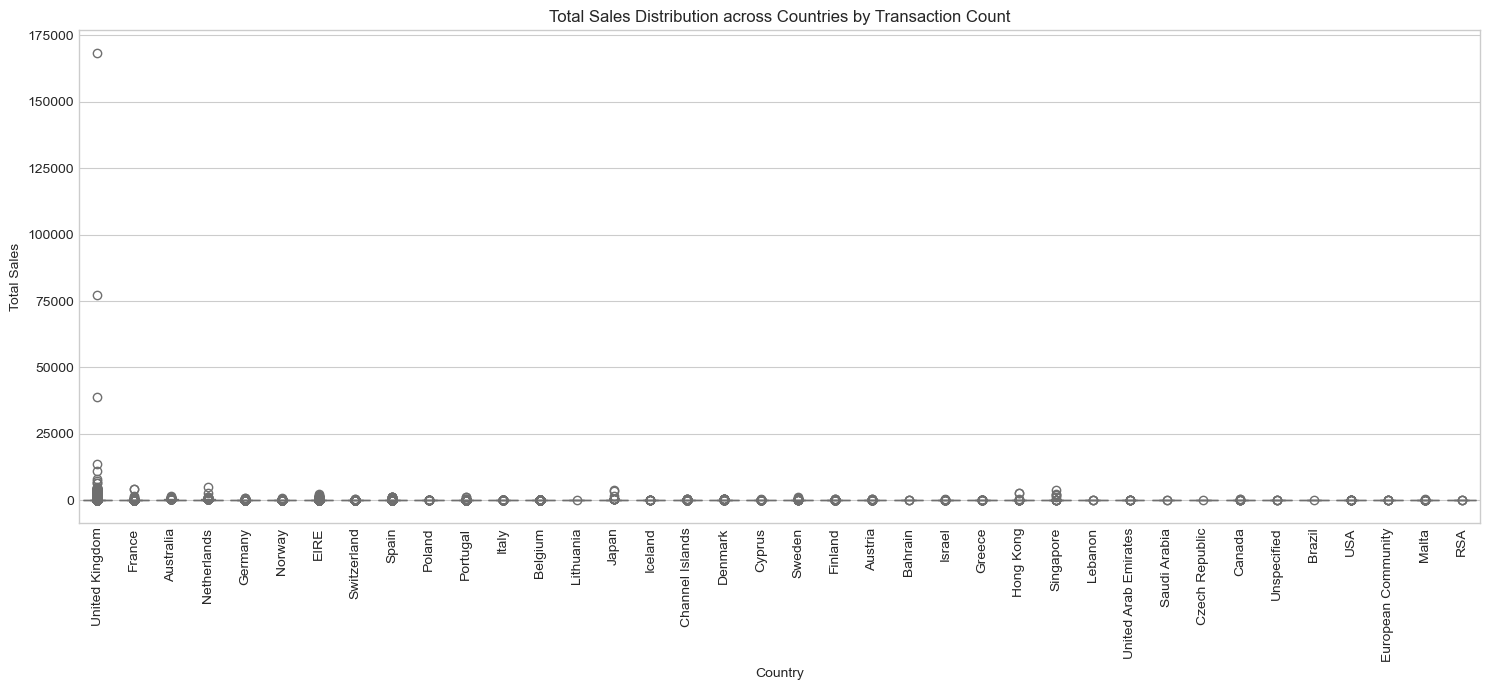

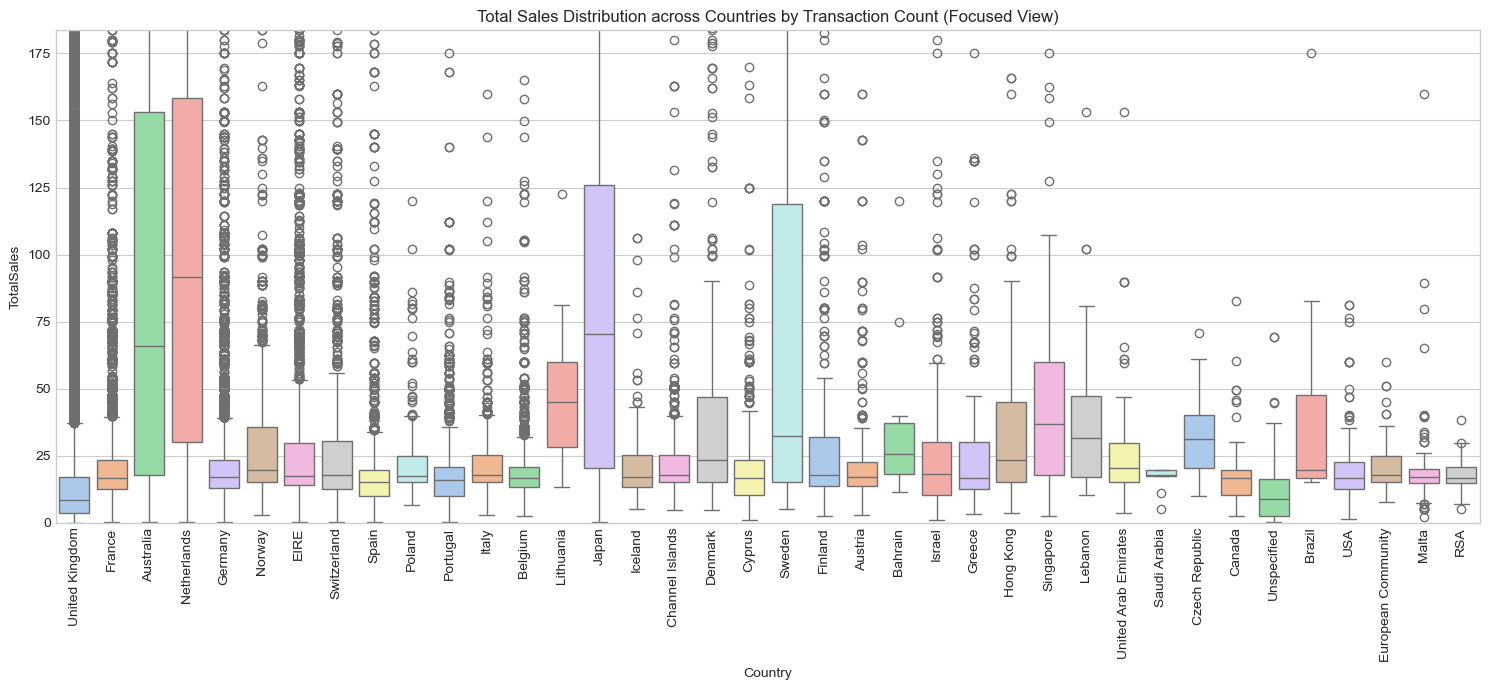

In [16]:
plt.figure(figsize = (15,7))
plt.title("Total Sales Distribution across Countries by Transaction Count")
sns.boxplot(data = df, x = 'Country', y = 'TotalSales', palette = 'pastel')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation = 90)
plt.tight_layout()

plt.figure(figsize = (15,7))
plt.title("Total Sales Distribution across Countries by Transaction Count (Focused View)")
ax = sns.boxplot(data = df, x = 'Country', y = 'TotalSales', palette = 'pastel')
plt.xticks(rotation = 90)
# Optionally, seting a y-axis limit to focus on the main distribution
ax.set_ylim(0, df['TotalSales'].quantile(0.99))  # Focusing on the 99th percentile to reduce the effect of extreme outliers for better visualization.
plt.tight_layout()

plt.show()

Based on the above box plots, the Netherlands, Japan, and Australia appear to have the high median total sales per transaction, indicated by the horizontal line within the colored boxes, compared to other countries. The other countries have very low median total sales, with majority of them clustered below 25, with few countries between 25 and 50.

The height of the boxes and the whiskers indicates the interquartile range (IQR) and overall data spread. Countries like Australia, Japan, Sweden and the Netherlands have a very high IQR, showing a large variability in their total sales per transaction. In contrast, countries like Germany, Portugal, Austria, Malta, Saudi Arabia, RSA , Spain, and Belgium have very compact boxes, meaning their sales are consistently low with little variation.

The plots reveal numerous outliers, especially for the United Kingdom. This indicates that while the typical sales for the UK are low, there are a few transactions with exceptionally high values, as seen in the second box plot. The other countries also have outliers, but they are less extreme in comparison to the UK.

## Multivariate Analysis

### Pair Plot

Generating Pair Plot...


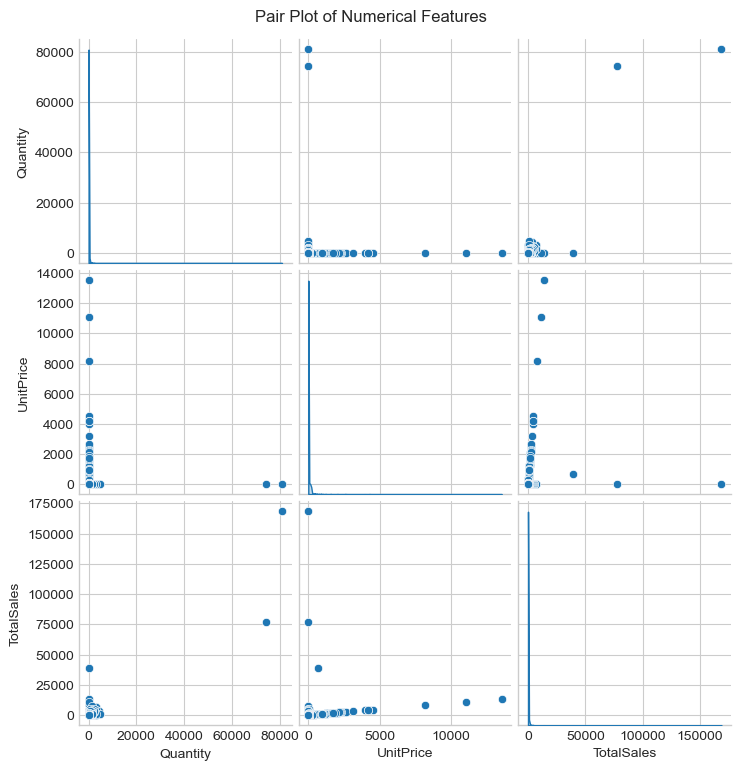

In [17]:
print("Generating Pair Plot...")
sns.pairplot(df[numerical_cols], diag_kind = 'kde')
plt.suptitle("Pair Plot of Numerical Features", y = 1.02)
plt.show()

Based on the pair plot of numerical features, the diagonal plots for `Quantity`, `UnitPrice`, and `TotalSales` all show a strong right-skewed distribution. This indicates that the vast majority of transactions involve very low quantities, low unit prices, and consequently, result in low total sales. A few rare transactions have exceptionally high values, appearing as outliers.

There is no clear linear relationship between the quantity of items sold and their unit price. The data points are primarily clustered in the low-value corner, with scattered outliers in other areas.

There is a strong positive correlation between quantity and total sales, with majority of data points in the low-value corner and very few data points with higher values.

There is also a strong positive correlation between unit price and total sales. Higher-priced items are associated with higher total sales.

### Principal Component Analysis (PCA)

In [18]:
x = df.loc[:, numerical_cols].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
principal_df['Country'] = df['Country'].reset_index(drop = True)

print("Explained Variance Ratio by Principal Components:")
print(f"- PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of the variance.")
print(f"- PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of the variance.")
print("The first two principal components together explain a total of {:.2f}% of the variance.".format(pca.explained_variance_ratio_.sum()*100))

Explained Variance Ratio by Principal Components:
- PC1 explains 63.91% of the variance.
- PC2 explains 33.37% of the variance.
The first two principal components together explain a total of 97.28% of the variance.


#### Visualization of PCA results

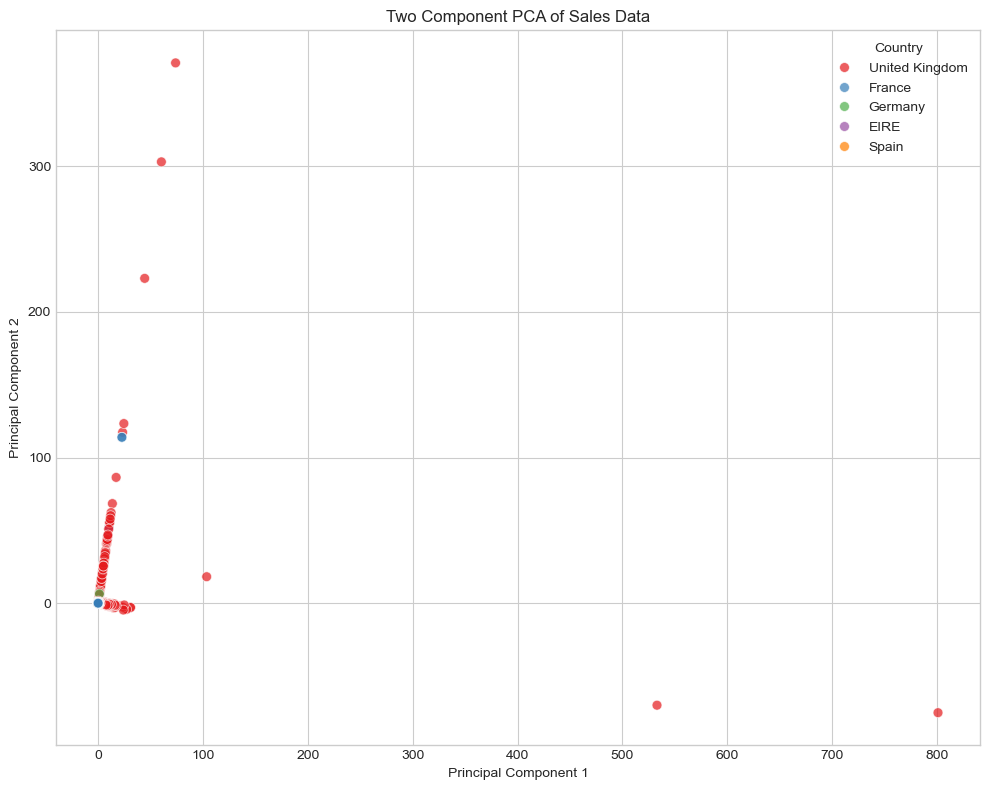

In [19]:
plt.figure(figsize = (10,8))
top_n_countries = df['Country'].value_counts().head(5).index.tolist()
sns.scatterplot(
    data = principal_df[principal_df['Country'].isin(top_n_countries)],
    x = 'PC1', y = 'PC2',
    hue = 'Country',
    palette = 'Set1',
    s = 50,
    alpha = 0.7
)
plt.title("Two Component PCA of Sales Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title = 'Country')
plt.tight_layout()
plt.show()

The scatter plot of the two-component PCA provides clear insights into the sales data. The fact that the first two principal components (PC1 and PC2) explain a total of **97.28%** of the variance means that this plot is an excellent representation of the original data, and almost no information was lost during the dimensionality reduction.

The data points for **France**, **Germany**, **EIRE**, and **Spain** are tightly clustered around the origin, indicating that their sales data is very similar and has low variance.

In contrast, the data points for the **United Kingdom** are widely scattered, extending far from the main cluster but majority of data points clustered around the origin. This shows that the UK's sales data is significantly different from all the other countries and is the primary driver of the variance captured by both principal components. The extreme points represent transactions that are very different from the typical sales behavior of the dataset.

## Visualizing Sales Patterns and Identifying the Outliers

### Time Series Visualization
Here, rolling average is used to smooth out short-term fluctuations and make the underlying trend more visible.

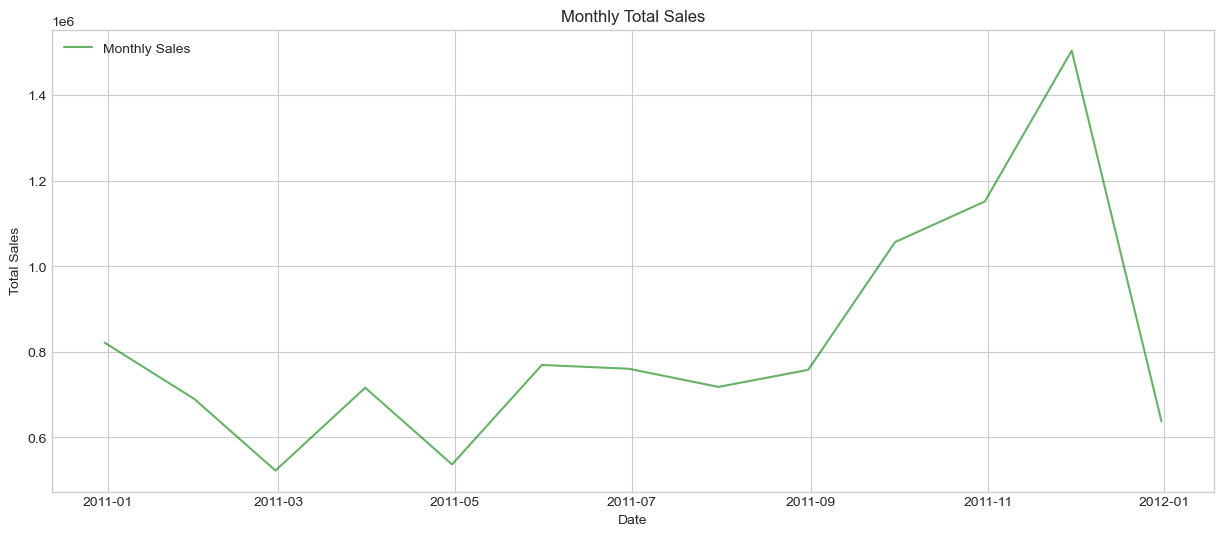

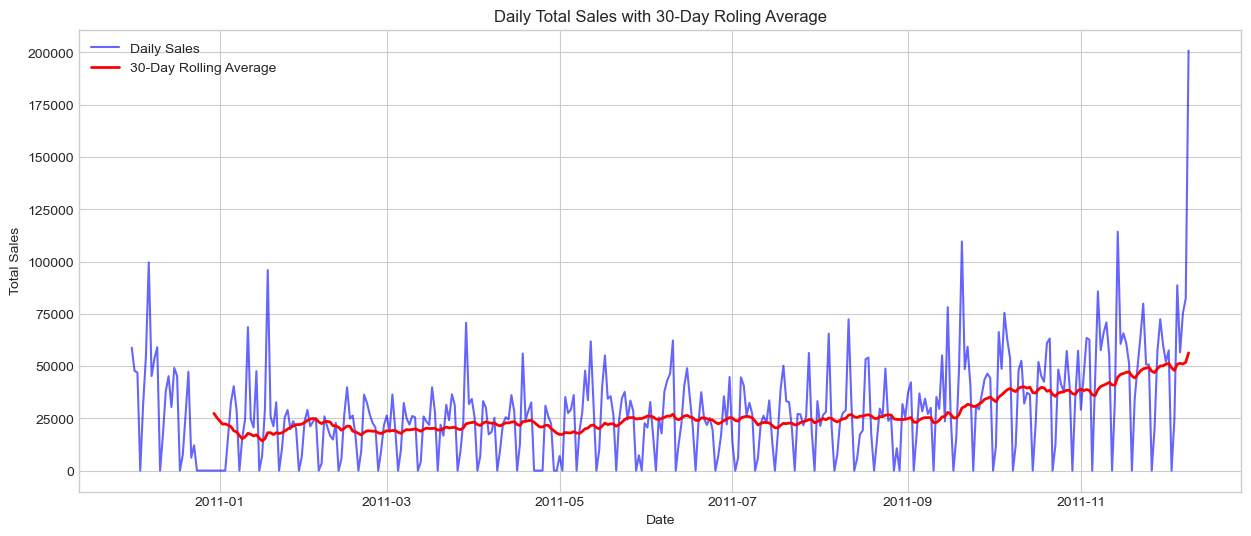

In [20]:
daily_sales = df.set_index('InvoiceDate')['TotalSales'].resample('D').sum()
monthly_sales = df.set_index('InvoiceDate')['TotalSales'].resample('M').sum()

plt.figure(figsize = (15,6))
plt.plot(monthly_sales, label = 'Monthly Sales', color = 'green', alpha = 0.6)
plt.title("Monthly Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

plt.figure(figsize = (15,6))
plt.plot(daily_sales, label = 'Daily Sales', color = 'blue', alpha = 0.6)
plt.plot(daily_sales.rolling(window = 30).mean(), label = '30-Day Rolling Average', color = 'red', linewidth = 2)
plt.title("Daily Total Sales with 30-Day Roling Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

#### Monthly Total Sales
There's a clear overall upward trend in monthly sales throughout the year 2011. Sales start at about 800,000 slightly before January 2011, in December 2010, initially it shows slight decrease till March 2011 and then climb steadily, with a significant spike in December 2011, before a sharp drop in January 2012.
The graph shows some seasonal patterns within the year. There's a noticeable dip in sales around March 2011 and another smaller dip in May 2011. The most significant seasonal peak occurs in December 2011, reaching a high of over 1.5 million, more than double the low point earlier in the year.

#### Daily Sales and 30-Day Rolling Average
The 30-day rolling average, shown by the red line, confirms the overall upward trend seen in the monthly sales data. It's a smoother representation of the daily sales, showing a gradual increase from early 2011, with a sharper acceleration in the latter half of the year.
The daily sales (blue line) exhibit significant volatility and short-term seasonality. There are frequent peaks and troughs, which could suggest weekly or even daily patterns. The large peaks in late 2011 and a massive spike in December 2011 followed by a decrease as indicated in monthly data further reinforce the strong seasonal nature of the sales, with the pattern being similar to the decrease in sales after December 2010 and then gradual increase in the early 2011. The 30-day rolling average effectively smoothes out this daily noise, making the underlying trend much clearer.

### Seasonal Decomposition
This technique separates the time series data into its core components:
1. **Trend:** The long-term direction of the data (e.g., increasing or decreasing).
2. **Seasonality:** The recurring patterns at fixed intervals (e.g., a yearly cycle or a monthly cycle).
3. **Residuals:** The remaining fluctuations that are not explained by the trend or seasonality.

Performing Seasonal Decomposition on Daily Sales Data...


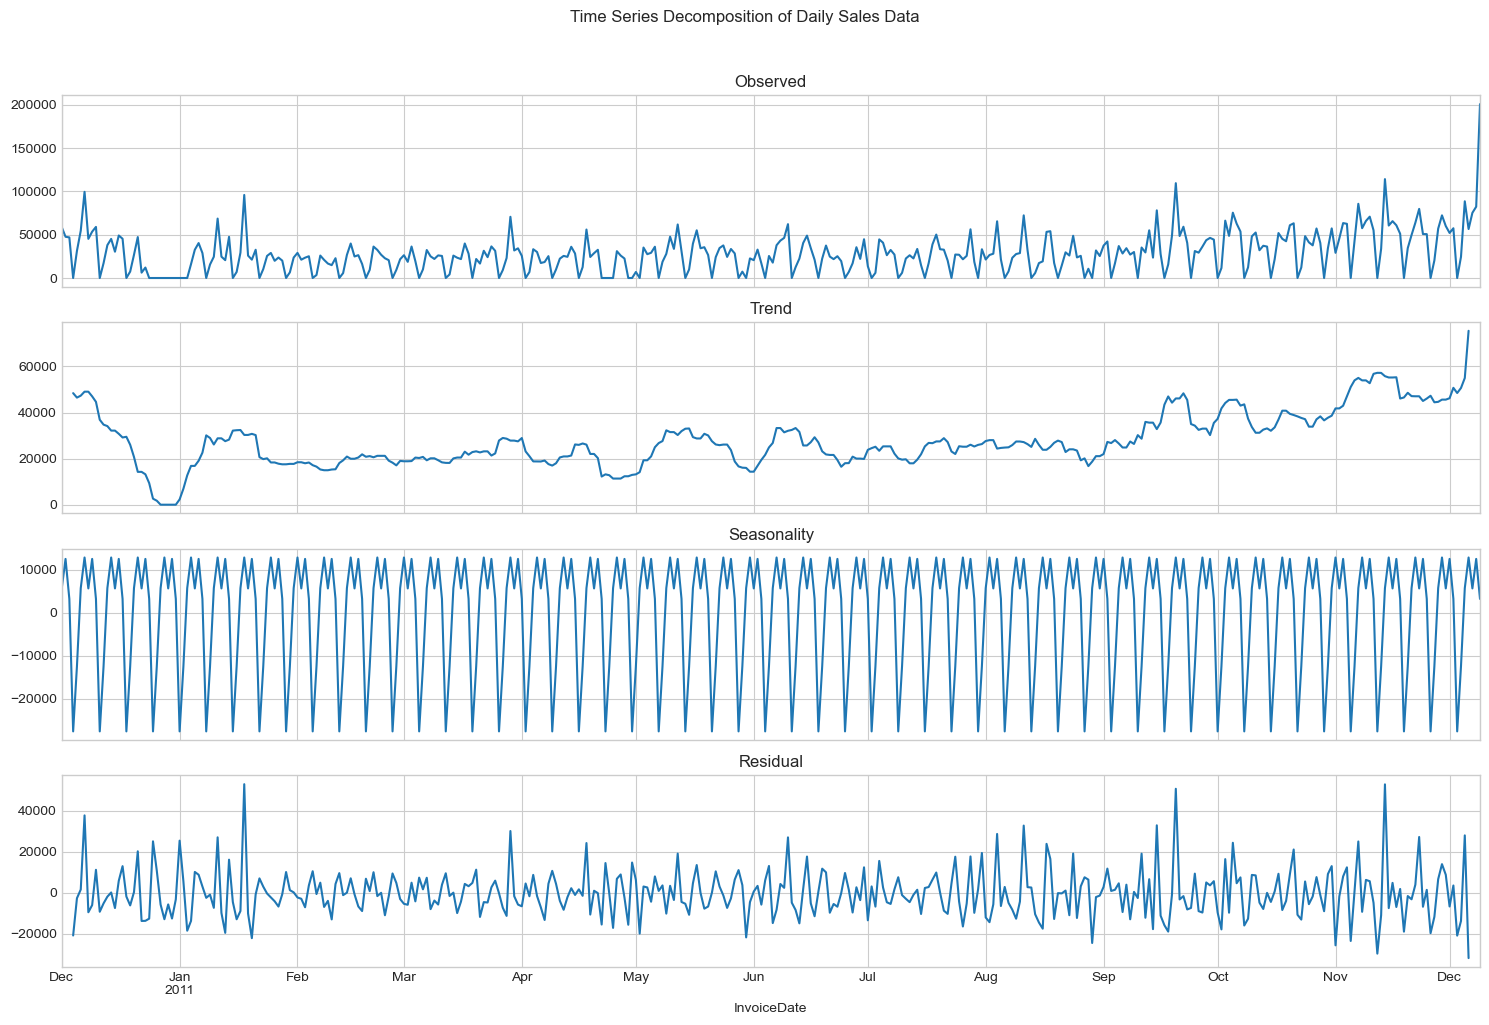

In [30]:
print("Performing Seasonal Decomposition on Daily Sales Data...")
result = seasonal_decompose(daily_sales.dropna(), model='additive')

fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
result.observed.plot(ax=axes[0])
axes[0].set_title('Observed')

result.trend.plot(ax=axes[1])
axes[1].set_title('Trend')

result.seasonal.plot(ax=axes[2])
axes[2].set_title('Seasonality')

result.resid.plot(ax=axes[3])
axes[3].set_title('Residual')

plt.suptitle("Time Series Decomposition of Daily Sales Data", y = 1.02)
plt.tight_layout()
plt.show()

Based on the provided graphs, we can make the following inferences about the seasonal decomposition of the daily sales data.

#### Trend Component
The trend component displays the long-term direction of the data. The graph shows a clear upward trend in total sales throughout the year 2011. Sales were relatively flat in the first half of the year, but began to rise steadily around mid-year, with a sharp increase near the end. This indicates a growing market or increased business activity over time.

#### Seasonal Component
The seasonal component indicates repeated patterns or cycles in the data. The graph demonstrates strong and consistent weekly seasonality. There are distinct peaks and troughs that occur at regular intervals, implying that sales are consistently higher on some days of the week and lower on others. This could be attributed to things like weekend shopping habits.

#### Residual component
The residual component represents the remaining fluctuations in the data after the trend and seasonal components have been eliminated. The residual plot displays a collection of dispersed data points. These points represent unpredictable or irregular events that affect sales, such as holidays, promotional sales offers and discounts, or unexpected events. The variance of these residuals appears to be relatively consistent throughout the year, with a few larger outliers at the beginning and end of the year.

### Identifying Outliers

#### Box Plot for detecting outliers

Identifying Outliers...


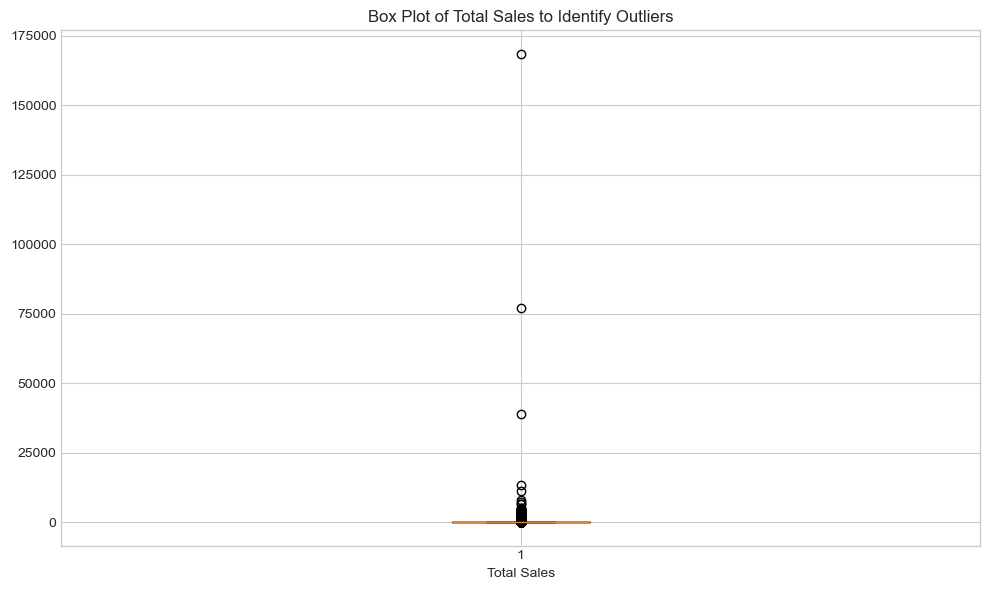

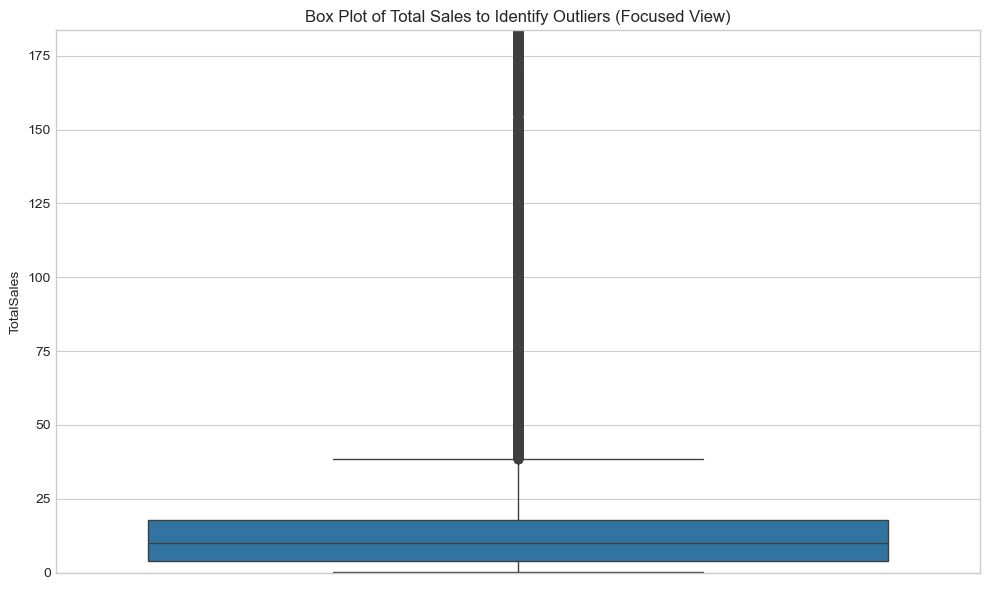

In [22]:
print("Identifying Outliers...")
plt.figure(figsize = (10,6))
plt.boxplot(x = df['TotalSales'])
plt.title("Box Plot of Total Sales to Identify Outliers")
plt.xlabel("Total Sales")
plt.tight_layout()

plt.figure(figsize = (10,6))
plt.title("Box Plot of Total Sales to Identify Outliers (Focused View)")
bx = sns.boxplot(data = df['TotalSales'])
# Optionally, seting a y-axis limit to focus on the main distribution
bx.set_ylim(0, df['TotalSales'].quantile(0.99))  # Focusing on the 99th percentile to reduce the effect of extreme outliers for better visualization.
plt.tight_layout()

plt.show()

The first box plot clearly shows a significant number of data points plotted individually above the main box-and-whisker plot. These points indicate transactions with unusually high total sales values. The majority of sales transactions occur within a very narrow range, as shown by the compact box in the second box plot. However, there are several data points that are far outside of this range, particularly at the upper end. The point around 175,000 is an extreme outlier, with others scattered below it. This suggests that a small number of transactions account for a disproportionately large share of total sales value.

#### Using Z-score method for detecting outliers
Z-score measures how many standard deviations a data point is from the mean, where a common practice is to flag the data points with a Z-score greater than 3 as outliers.

In [23]:
z_scores = np.abs((df['TotalSales'] - df['TotalSales'].mean()) / df['TotalSales'].std())
outliers = df[z_scores > 3]
print(f"Number of Outliers detected using Z-score method: {len(outliers)}")
print("First Five Outliers:")
print(outliers[['InvoiceNo', 'InvoiceDate', 'Country', 'TotalSales']].head())

Number of Outliers detected using Z-score method: 530
First Five Outliers:
     InvoiceNo         InvoiceDate         Country  TotalSales
838     536477 2010-12-01 12:27:00  United Kingdom      1627.2
2285    536584 2010-12-01 16:22:00  United Kingdom      1132.8
4395    536785 2010-12-02 15:22:00  United Kingdom      1576.8
4720    536809 2010-12-02 16:48:00  United Kingdom      1003.2
4785    536830 2010-12-02 17:38:00  United Kingdom      1484.0


In [24]:
# Perform the ADF test on the 'TotalSales' time series
result = adfuller(daily_sales.dropna())

# Print the results of the ADF test
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("\nConclusion: The p-value is less than or equal to 0.05. The time series is likely stationary.")
else:
    print("\nConclusion: The p-value is greater than 0.05. The time series is likely non-stationary.")

ADF Statistic: -0.641691
p-value: 0.861281
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571

Conclusion: The p-value is greater than 0.05. The time series is likely non-stationary.
